In [1]:
!pip install cassandra-driver


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 31.0 MB/s eta 0:00:00


In [4]:
import logging
import json
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from functools import wraps
from typing import Any, Callable


# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)


# Decorator to log function calls and errors
def log_function_call(func: Callable) -> Callable:
    @wraps(func)
    def wrapper(*args, **kwargs):
        try:
            logger.info(f"Calling function {func.__name__} with arguments {args} and {kwargs}")
            result = func(*args, **kwargs)
            logger.info(f"Function {func.__name__} executed successfully.")
            return result
        except Exception as e:
            logger.error(f"Error in function {func.__name__}: {e}")
            raise
    return wrapper


# Serialization and Deserialization Functions
def serialize_data(data: Any) -> str:
    """Convert Python object to JSON string."""
    try:
        return json.dumps(data)
    except (TypeError, ValueError) as e:
        logger.error(f"Serialization error: {e}")
        raise


def deserialize_data(data: str) -> Any:
    """Convert JSON string back to Python object."""
    try:
        return json.loads(data)
    except (TypeError, ValueError) as e:
        logger.error(f"Deserialization error: {e}")
        raise


# Cassandra DB Connection Class
class CassandraDB:
    def __init__(self, secure_connect_path: str, client_id: str, client_secret: str):
        self.secure_connect_path = secure_connect_path
        self.client_id = client_id
        self.client_secret = client_secret
        self.cluster = None
        self.session = None

    @log_function_call
    def connect(self):
        """Establish connection to Cassandra Astra DB."""
        try:
            auth_provider = PlainTextAuthProvider(self.client_id, self.client_secret)
            self.cluster = Cluster(cloud={'secure_connect_bundle': self.secure_connect_path}, auth_provider=auth_provider)
            self.session = self.cluster.connect()
            logger.info("Connected to Astra DB!")
        except Exception as e:
            logger.error(f"Failed to connect to Astra DB: {e}")
            raise

    @log_function_call
    def set_keyspace(self, keyspace: str):
        """Set the keyspace for Cassandra session."""
        try:
            self.session.set_keyspace(keyspace)
            logger.info(f"Keyspace '{keyspace}' set successfully.")
        except Exception as e:
            logger.error(f"Failed to set keyspace: {e}")
            raise


# Example function to demonstrate functional programming concepts
def get_data_from_db(query: str) -> str:
    """Fetch data from DB (pure function for demo purposes)."""
    return f"Executing query: {query}"


# Unit Test Example
import unittest

class TestCassandraConnection(unittest.TestCase):

    def setUp(self):
        """Set up the test case."""
        self.db = CassandraDB(secure_connect_path='/content/secure-connect-finalbigdataproject.zip',
                              client_id='FYIMqHUaDwjePnFIedsfyaMM',
                              client_secret='wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h')

    def test_connect(self):
        """Test connection to Cassandra DB."""
        self.db.connect()
        self.assertIsNotNone(self.db.session, "DB connection failed.")

    def test_serialize_data(self):
        """Test the serialization of data."""
        data = {'name': 'test', 'value': 42}
        serialized_data = serialize_data(data)
        self.assertEqual(serialized_data, '{"name": "test", "value": 42}')

    def test_deserialize_data(self):
        """Test the deserialization of data."""
        data = '{"name": "test", "value": 42}'
        deserialized_data = deserialize_data(data)
        self.assertEqual(deserialized_data, {'name': 'test', 'value': 42})


if __name__ == "__main__":
    # Running the example
    db = CassandraDB(secure_connect_path='/content/secure-connect-finalbigdataproject.zip',
                     client_id='FYIMqHUaDwjePnFIedsfyaMM',
                     client_secret='wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h')
    db.connect()
    db.set_keyspace('bigdata')

    # Example of functional programming
    query = "SELECT * FROM users;"
    print(get_data_from_db(query))

    # Test serialization/deserialization
    data = {'key': 'value'}
    serialized = serialize_data(data)
    deserialized = deserialize_data(serialized)
    print(f"Serialized: {serialized}, Deserialized: {deserialized}")

    # Run unit tests
    unittest.main(argv=[''], exit=False)



Executing query: SELECT * FROM users;
Serialized: {"key": "value"}, Deserialized: {'key': 'value'}


...
----------------------------------------------------------------------
Ran 3 tests in 5.591s

OK


In [ ]:
import csv
import uuid
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from cassandra.query import BatchStatement
from datetime import datetime

# Set up Astra DB connection credentials
secure_connect_bundle_path = "/content/secure-connect-bigdatafinaldata.zip"  # Path to your Secure Connect Bundle
client_id = "ZPSOpLncAkjieQrlXyZRLBnw"  # Your Client ID from Astra DB
client_secret ="FCc2F9qSScID56ET-tQOiSZxat-T_jEkjQm7Kpu53P+P.HfejZxA0ZM+-7Fribu_hSTTinSkZ8xSioQapbXU6brguDRb,nSSlYgNt-v-F17ZOUc1PIE_FSLCqZRo2fr5"  # Your Client Secret from Astra DB

# Set up the authentication and connection
auth_provider = PlainTextAuthProvider(client_id, client_secret)
cluster = Cluster(cloud={'secure_connect_bundle': secure_connect_bundle_path}, auth_provider=auth_provider)
session = cluster.connect('finaldata')  # Use the finaldata keyspace

# Open the CSV file and prepare to insert the data
csv_file_path = '/content/data.csv'  # Path to your CSV file

# Prepare the CQL query for inserting data
insert_query = """
INSERT INTO sales_data (
    region, country, item_type, sales_channel, order_priority, order_date,
    order_id, ship_date, units_sold, unit_price, unit_cost, total_revenue,
    total_cost, total_profit
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

# Create a BatchStatement to hold multiple insert queries
BATCH_SIZE = 1000  # Limit the batch size to 1000 rows
batch = BatchStatement()
batch_count = 0

with open(csv_file_path, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    for row in csv_reader:
        # Convert the row data to appropriate types
        order_id = uuid.uuid4()  # Generate a unique ID for each order
        region = row['Region']
        country = row['Country']
        item_type = row['Item Type']
        sales_channel = row['Sales Channel']
        order_priority = row['Order Priority']

        # Convert the order_date and ship_date to datetime objects
        order_date = datetime.strptime(row['Order Date'], '%m/%d/%Y').date()
        ship_date = datetime.strptime(row['Ship Date'], '%m/%d/%Y').date()

        # Convert the numerical fields
        units_sold = int(row['Units Sold'])
        unit_price = float(row['Unit Price'])
        unit_cost = float(row['Unit Cost'])
        total_revenue = float(row['Total Revenue'])
        total_cost = float(row['Total Cost'])
        total_profit = float(row['Total Profit'])

        # Add the insert query to the batch
        batch.add(insert_query, (
            region, country, item_type, sales_channel, order_priority, order_date,
            order_id, ship_date, units_sold, unit_price, unit_cost, total_revenue,
            total_cost, total_profit
        ))

        batch_count += 1

        # If the batch size exceeds the threshold, execute and reset the batch
        if batch_count >= BATCH_SIZE:
            session.execute(batch)
            batch = BatchStatement()  # Reset the batch
            batch_count = 0

# Execute any remaining inserts in the last batch
if batch_count > 0:
    session.execute(batch)

print("Bulk data has been successfully inserted into Astra DB.")


Bulk data has been successfully inserted into Astra DB.


In [6]:
import logging
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from functools import wraps
from typing import List

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Decorator to log function calls and errors
def log_function_call(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        try:
            logger.info(f"Calling function {func.__name__} with arguments {args} and {kwargs}")
            result = func(*args, **kwargs)
            logger.info(f"Function {func.__name__} executed successfully.")
            return result
        except Exception as e:
            logger.error(f"Error in function {func.__name__}: {e}")
            raise
    return wrapper

# Cassandra DB Connection Class
class CassandraDB:
    def __init__(self, secure_connect_path: str, client_id: str, client_secret: str):
        self.secure_connect_path = secure_connect_path
        self.client_id = client_id
        self.client_secret = client_secret
        self.cluster = None
        self.session = None

    @log_function_call
    def connect(self):
        """Establish connection to Cassandra Astra DB."""
        try:
            auth_provider = PlainTextAuthProvider(self.client_id, self.client_secret)
            self.cluster = Cluster(cloud={'secure_connect_bundle': self.secure_connect_path}, auth_provider=auth_provider)
            self.session = self.cluster.connect()
            logger.info("Connected to Astra DB!")
        except Exception as e:
            logger.error(f"Failed to connect to Astra DB: {e}")
            raise

    @log_function_call
    def set_keyspace(self, keyspace: str):
        """Set the keyspace for Cassandra session."""
        try:
            self.session.set_keyspace(keyspace)
            logger.info(f"Keyspace '{keyspace}' set successfully.")
        except Exception as e:
            logger.error(f"Failed to set keyspace: {e}")
            raise

    @log_function_call
    def get_columns(self, table_name: str) -> List[str]:
        """Get the column names of a specific table."""
        describe_query = f"""
        SELECT column_name
        FROM system_schema.columns
        WHERE keyspace_name = 'bigdata' AND table_name = '{table_name}'
        """
        try:
            describe_result = self.session.execute(describe_query)
            columns = [row.column_name for row in describe_result]
            return columns
        except Exception as e:
            logger.error(f"Error getting columns from table '{table_name}': {e}")
            raise

    @log_function_call
    def get_row_count(self, table_name: str) -> int:
        """Get the row count of a specific table."""
        count_query = f"SELECT COUNT(*) FROM {table_name}"
        try:
            count_result = self.session.execute(count_query)
            return count_result.one()[0]
        except Exception as e:
            logger.error(f"Error getting row count from table '{table_name}': {e}")
            raise

# Function to fetch table details (columns and row count)
def get_table_details(db: CassandraDB, table_name: str):
    """Fetch and display the columns and row count for a given table."""
    columns = db.get_columns(table_name)
    row_count = db.get_row_count(table_name)

    # Display results
    print(f"Number of columns in '{table_name}' table: {len(columns)}")
    print(f"Columns in '{table_name}' table: {columns}")
    print(f"Number of rows in '{table_name}' table: {row_count}")

# Main execution
if __name__ == "__main__":
    # Define your Astra DB credentials and secure connect path
    secure_connect_path = "/content/secure-connect-finalbigdataproject.zip"
    client_id = 'FYIMqHUaDwjePnFIedsfyaMM'
    client_secret = 'wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h'

    # Initialize CassandraDB instance
    db = CassandraDB(secure_connect_path, client_id, client_secret)

    try:
        # Connect to Astra DB and set the keyspace
        db.connect()
        db.set_keyspace('bigdata')

        # Get details for 'sales_data' table
        get_table_details(db, 'sales_data')

    except Exception as e:
        logger.error(f"An error occurred during execution: {e}")


Number of columns in 'sales_data' table: 14
Columns in 'sales_data' table: ['country', 'item_type', 'order_date', 'order_id', 'order_priority', 'region', 'sales_channel', 'ship_date', 'total_cost', 'total_profit', 'total_revenue', 'unit_cost', 'unit_price', 'units_sold']
Number of rows in 'sales_data' table: 100000


In [9]:
import logging
import os

# Log file configuration
log_file_path = 'application.log'  # You can specify any path here

# Create logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create handlers
console_handler = logging.StreamHandler()  # Log to console
file_handler = logging.FileHandler(log_file_path)  # Log to file

# Create formatter
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')

# Set formatter for both handlers
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

# Add handlers to logger
logger.addHandler(console_handler)
logger.addHandler(file_handler)

# Test logging
logger.info("This is an info message")
logger.error("This is an error message")


2024-12-19 18:51:36,424 - INFO - This is an info message
INFO:__main__:This is an info message
2024-12-19 18:51:36,438 - ERROR - This is an error message
ERROR:__main__:This is an error message


In [10]:
import logging
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from functools import wraps
from datetime import datetime
from typing import Callable

# Configure logging to capture all messages including warnings and errors
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Decorator to log function calls and errors
def log_function_call(func: Callable) -> Callable:
    @wraps(func)
    def wrapper(*args, **kwargs):
        try:
            logger.info(f"Calling function {func.__name__} with arguments {args} and {kwargs}")
            result = func(*args, **kwargs)
            logger.info(f"Function {func.__name__} executed successfully.")
            return result
        except Exception as e:
            logger.error(f"Error in function {func.__name__}: {e}")
            raise
    return wrapper

# Cassandra DB Connection Class
class CassandraDB:
    def __init__(self, secure_connect_path: str, client_id: str, client_secret: str, protocol_version: int):
        self.secure_connect_path = secure_connect_path
        self.client_id = client_id
        self.client_secret = client_secret
        self.protocol_version = protocol_version
        self.cluster = None
        self.session = None

    @log_function_call
    def connect(self):
        """Establish connection to Cassandra Astra DB."""
        try:
            auth_provider = PlainTextAuthProvider(self.client_id, self.client_secret)
            self.cluster = Cluster(
                cloud={'secure_connect_bundle': self.secure_connect_path},
                auth_provider=auth_provider,
                protocol_version=self.protocol_version  # Explicitly set protocol version
            )
            self.session = self.cluster.connect()
            logger.info("Connected to Astra DB!")
        except Exception as e:
            logger.error(f"Failed to connect to Astra DB: {e}")
            raise

    @log_function_call
    def set_keyspace(self, keyspace: str):
        """Set the keyspace for Cassandra session."""
        try:
            self.session.set_keyspace(keyspace)
            logger.info(f"Keyspace '{keyspace}' set successfully.")
        except Exception as e:
            logger.error(f"Failed to set keyspace: {e}")
            raise

    @log_function_call
    def standardize_data(self):
        """Standardize data (e.g., Date format)."""
        try:
            update_query = """
            UPDATE sales_data
            SET order_date = TO_DATE(?,'MM/dd/yyyy')
            WHERE order_id = ?
            """

            # Query the data (in practice, you would query batches of data to avoid timeouts)
            rows = self.session.execute("SELECT order_id, order_date FROM sales_data")

            # Count rows in ResultSet
            row_count = sum(1 for _ in rows)  # This will count the rows in the ResultSet
            if row_count > 0:
                logger.info(f"Fetched {row_count} rows from sales_data table.")
            else:
                logger.warning("No data found in 'sales_data' table.")

            # Process each row
            for row in rows:
                if isinstance(row.order_date, str):  # Ensure we only convert strings to date
                    try:
                        standardized_date = datetime.strptime(row.order_date, "%m/%d/%Y").date()
                        self.session.execute(update_query, (standardized_date, row.order_id))
                        logger.info(f"Order ID {row.order_id} updated with standardized date.")
                    except Exception as e:
                        logger.error(f"Date format issue for order_id {row.order_id}: {str(e)}")
                else:
                    logger.info(f"Skipping order_id {row.order_id}, as it's already in Date format.")

            logger.info("Date fields standardized successfully.")
        except Exception as e:
            logger.error(f"Error in standardizing data: {str(e)}")
            raise

# Function to clean data
def perform_cleaning(db: CassandraDB):
    """Call all cleaning functions."""
    db.standardize_data()  # Standardize date format and other fields

# Main execution
if __name__ == "__main__":
    # Reuse already defined paths and credentials
    secure_connect_path = "/content/secure-connect-finalbigdataproject.zip"  # Path to your secure connect bundle
    client_id = 'FYIMqHUaDwjePnFIedsfyaMM'  # Your client ID
    client_secret = 'wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h'  # Your client secret
    protocol_version = 4  # Example protocol version, adjust if necessary

    # Initialize CassandraDB instance with previously defined values
    db = CassandraDB(secure_connect_path, client_id, client_secret, protocol_version)

    try:
        # Connect to Astra DB and set the keyspace
        db.connect()
        db.set_keyspace('bigdata')

        # Run the cleaning process
        perform_cleaning(db)

    except Exception as e:
        logger.error(f"An error occurred during execution: {e}")


2024-12-19 18:51:39,099 - INFO - Calling function connect with arguments (<__main__.CassandraDB object at 0x788de0883b80>,) and {}
INFO:__main__:Calling function connect with arguments (<__main__.CassandraDB object at 0x788de0883b80>,) and {}
2024-12-19 18:51:41,509 - INFO - Connected to Astra DB!
INFO:__main__:Connected to Astra DB!
2024-12-19 18:51:41,513 - INFO - Function connect executed successfully.
INFO:__main__:Function connect executed successfully.
2024-12-19 18:51:41,519 - INFO - Calling function set_keyspace with arguments (<__main__.CassandraDB object at 0x788de0883b80>, 'bigdata') and {}
INFO:__main__:Calling function set_keyspace with arguments (<__main__.CassandraDB object at 0x788de0883b80>, 'bigdata') and {}
2024-12-19 18:51:41,743 - INFO - Keyspace 'bigdata' set successfully.
INFO:__main__:Keyspace 'bigdata' set successfully.
2024-12-19 18:51:41,746 - INFO - Function set_keyspace executed successfully.
INFO:__main__:Function set_keyspace executed successfully.
2024-1

In [11]:
import logging
import json
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from cassandra.query import BatchStatement
from functools import wraps
from typing import Any, Callable
from datetime import datetime

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Decorator to log function calls and errors
def log_function_call(func: Callable) -> Callable:
    """Decorator to log function calls and handle errors."""
    @wraps(func)
    def wrapper(*args, **kwargs):
        try:
            logger.info(f"Calling function {func.__name__} with arguments {args} and {kwargs}")
            result = func(*args, **kwargs)
            logger.info(f"Function {func.__name__} executed successfully.")
            return result
        except Exception as e:
            logger.error(f"Error in function {func.__name__}: {e}")
            raise
    return wrapper

# Serialize and Deserialize utility functions for JSON
def serialize_data(data: Any) -> str:
    """Serialize data to a JSON string."""
    try:
        return json.dumps(data)
    except (TypeError, ValueError) as e:
        logger.error(f"Serialization error: {e}")
        raise

def deserialize_data(data: str) -> Any:
    """Deserialize JSON string back to Python object."""
    try:
        return json.loads(data)
    except (TypeError, ValueError) as e:
        logger.error(f"Deserialization error: {e}")
        raise

# Python Class for managing Cassandra connection and operations
class CassandraDB:
    def __init__(self, secure_connect_bundle: str, client_id: str, client_secret: str, protocol_version: int = 4):
        self.secure_connect_bundle = secure_connect_bundle
        self.client_id = client_id
        self.client_secret = client_secret
        self.protocol_version = protocol_version
        self.cluster = None
        self.session = None

    @log_function_call
    def connect(self):
        """Connect to the Cassandra DB."""
        auth_provider = PlainTextAuthProvider(self.client_id, self.client_secret)
        self.cluster = Cluster(
            cloud={'secure_connect_bundle': self.secure_connect_bundle},
            auth_provider=auth_provider,
            protocol_version=self.protocol_version
        )
        self.session = self.cluster.connect()
        logger.info("Connected to Astra DB!")

    @log_function_call
    def set_keyspace(self, keyspace: str):
        """Set the keyspace."""
        self.session.set_keyspace(keyspace)
        logger.info(f"Keyspace '{keyspace}' set successfully.")

    @log_function_call
    def remove_duplicates(self):
        """Remove duplicate entries from 'sales_data' table based on 'order_id'."""
        try:
            query = "SELECT order_id FROM sales_data"
            statement = self.session.prepare(query)

            # Prepare a batch for deletion
            batch = BatchStatement()
            batch_count = 0
            duplicate_order_ids = set()
            order_ids_to_delete = set()

            # Loop over rows with pagination (to avoid 'len' issue)
            rows = self.session.execute(statement)
            while True:
                for row in rows:
                    order_id = row.order_id
                    if order_id in duplicate_order_ids:
                        order_ids_to_delete.add(order_id)
                    else:
                        duplicate_order_ids.add(order_id)

                    # Add deletion to batch if duplicate
                    if order_id in order_ids_to_delete:
                        logger.info(f"Found duplicate for order_id: {order_id}")
                        batch.add("DELETE FROM sales_data WHERE order_id = ?;", (order_id,))
                        batch_count += 1

                    # Execute batch when it reaches the batch size
                    if batch_count >= 1000:
                        logger.info("Executing batch...")
                        self.session.execute(batch)
                        batch = BatchStatement()
                        batch_count = 0

                # Check for next page of results (pagination)
                if rows.has_more_pages:
                    logger.info("Fetching next page of results...")
                    rows = self.session.execute(statement, paging_state=rows.paging_state)
                else:
                    break

            # Execute any remaining queries in the batch
            if batch_count > 0:
                logger.info(f"Executing final batch with {batch_count} deletes.")
                self.session.execute(batch)

            # If no duplicates found
            if not order_ids_to_delete:
                logger.info("No duplicates found!")
            else:
                logger.info(f"Successfully removed {len(order_ids_to_delete)} duplicates.")
        except Exception as e:
            logger.error(f"Error in removing duplicates: {e}")
            raise

# Functional Programming Example: Pure function to count duplicates
def count_duplicates(session):
    query = "SELECT order_id FROM sales_data"
    statement = session.prepare(query)
    rows = session.execute(statement)
    order_ids = [row.order_id for row in rows]
    return len(order_ids) - len(set(order_ids))

if __name__ == '__main__':
    logger.info("Starting duplicate removal process...")

    # Create connection to Astra DB
    secure_connect_bundle = '/content/secure-connect-finalbigdataproject.zip'
    client_id = 'FYIMqHUaDwjePnFIedsfyaMM'
    client_secret = 'wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h'

    # Initialize CassandraDB class and connect
    db = CassandraDB(secure_connect_bundle, client_id, client_secret)
    db.connect()
    db.set_keyspace('bigdata')

    # Call the function to remove duplicates
    db.remove_duplicates()

    # Functional example: Counting duplicates before and after removal
    initial_count = count_duplicates(db.session)
    logger.info(f"Initial duplicate count: {initial_count}")
    final_count = count_duplicates(db.session)
    logger.info(f"Final duplicate count: {final_count}")

    # Optionally, serialize data
    data = {"status": "process_complete", "removed_duplicates": final_count}
    serialized = serialize_data(data)
    logger.info(f"Serialized data: {serialized}")


2024-12-19 18:51:59,803 - INFO - Starting duplicate removal process...
INFO:__main__:Starting duplicate removal process...
2024-12-19 18:51:59,812 - INFO - Calling function connect with arguments (<__main__.CassandraDB object at 0x788dc85c3880>,) and {}
INFO:__main__:Calling function connect with arguments (<__main__.CassandraDB object at 0x788dc85c3880>,) and {}
2024-12-19 18:52:02,823 - INFO - Connected to Astra DB!
INFO:__main__:Connected to Astra DB!
2024-12-19 18:52:02,830 - INFO - Function connect executed successfully.
INFO:__main__:Function connect executed successfully.
2024-12-19 18:52:02,835 - INFO - Calling function set_keyspace with arguments (<__main__.CassandraDB object at 0x788dc85c3880>, 'bigdata') and {}
INFO:__main__:Calling function set_keyspace with arguments (<__main__.CassandraDB object at 0x788dc85c3880>, 'bigdata') and {}
2024-12-19 18:52:03,053 - INFO - Keyspace 'bigdata' set successfully.
INFO:__main__:Keyspace 'bigdata' set successfully.
2024-12-19 18:52:03,

In [12]:
import logging
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from cassandra.query import BatchStatement
import statistics
from functools import wraps
from typing import Any, Callable, List, Optional

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Decorator to log function calls and errors
def log_function_call(func: Callable) -> Callable:
    """Decorator to log function calls and handle errors."""
    @wraps(func)
    def wrapper(*args, **kwargs):
        try:
            logger.info(f"Calling function {func.__name__} with arguments {args} and {kwargs}")
            result = func(*args, **kwargs)
            logger.info(f"Function {func.__name__} executed successfully.")
            return result
        except Exception as e:
            logger.error(f"Error in function {func.__name__}: {e}")
            raise
    return wrapper

# Cassandra connection class
class CassandraConnector:
    """Class to manage Cassandra connections and operations."""

    def __init__(self, secure_connect_bundle: str, client_id: str, client_secret: str, keyspace: str):
        self.secure_connect_bundle = secure_connect_bundle
        self.client_id = client_id
        self.client_secret = client_secret
        self.keyspace = keyspace
        self.session = None

    def create_connection(self) -> None:
        """Creates and returns a Cassandra session."""
        auth_provider = PlainTextAuthProvider(self.client_id, self.client_secret)
        cluster = Cluster(cloud={'secure_connect_bundle': self.secure_connect_bundle}, auth_provider=auth_provider)
        cluster.protocol_version = 4
        self.session = cluster.connect(self.keyspace)
        logger.info("Cassandra connection established.")

    def execute_query(self, query: str, params: Optional[List[Any]] = None) -> Any:
        """Executes a query and returns the result."""
        try:
            if params:
                return self.session.execute(query, params)
            else:
                return self.session.execute(query)
        except Exception as e:
            logger.error(f"Error executing query: {e}")
            raise

    def execute_batch(self, batch: BatchStatement) -> None:
        """Executes a batch of statements."""
        try:
            self.session.execute(batch)
        except Exception as e:
            logger.error(f"Error executing batch: {e}")
            raise


class DataCleaner:
    """Class to handle missing data and clean the database."""

    def __init__(self, session: Any):
        self.session = session

    @log_function_call
    def handle_missing_values(self) -> None:
        """Handle missing values by filling them with mean for numerical and mode for categorical data."""
        logger.info("Starting to handle missing values...")

        # Step 1: Calculate the mean and mode for numerical and categorical columns
        select_query = """
            SELECT order_id, units_sold, unit_price, unit_cost, total_revenue, total_cost, total_profit,
                   region, country, item_type, sales_channel, order_priority, ship_date
            FROM sales_data
        """
        rows = self.session.execute(select_query)

        # Prepare lists to calculate mean for numeric columns and mode for categorical columns
        units_sold_values, unit_price_values, unit_cost_values, total_revenue_values = [], [], [], []
        total_cost_values, total_profit_values = [], []
        region_values, country_values, item_type_values = [], [], []
        sales_channel_values, order_priority_values = [], []

        missing_values_found = False

        # Gather data for statistical calculations
        for row in rows:
            if row.units_sold is None:
                missing_values_found = True
            if row.unit_price is None:
                missing_values_found = True
            if row.unit_cost is None:
                missing_values_found = True
            if row.total_revenue is None:
                missing_values_found = True
            if row.total_cost is None:
                missing_values_found = True
            if row.total_profit is None:
                missing_values_found = True
            if row.region is None:
                missing_values_found = True
            if row.country is None:
                missing_values_found = True
            if row.item_type is None:
                missing_values_found = True
            if row.sales_channel is None:
                missing_values_found = True
            if row.order_priority is None:
                missing_values_found = True

        # If no missing values are found, log it
        if not missing_values_found:
            logger.info("No missing values found in the dataset.")

        # If missing values are found, calculate and fill them
        if missing_values_found:
            # Compute means and modes
            mean_values = {
                "units_sold": statistics.mean(units_sold_values) if units_sold_values else 0,
                "unit_price": statistics.mean(unit_price_values) if unit_price_values else 0,
                "unit_cost": statistics.mean(unit_cost_values) if unit_cost_values else 0,
                "total_revenue": statistics.mean(total_revenue_values) if total_revenue_values else 0,
                "total_cost": statistics.mean(total_cost_values) if total_cost_values else 0,
                "total_profit": statistics.mean(total_profit_values) if total_profit_values else 0,
            }

            mode_values = {
                "region": statistics.mode(region_values) if region_values else None,
                "country": statistics.mode(country_values) if country_values else None,
                "item_type": statistics.mode(item_type_values) if item_type_values else None,
                "sales_channel": statistics.mode(sales_channel_values) if sales_channel_values else None,
                "order_priority": statistics.mode(order_priority_values) if order_priority_values else None,
            }

            # Update missing values in the database
            update_query = """
                UPDATE sales_data
                SET units_sold = ?, unit_price = ?, unit_cost = ?, total_revenue = ?, total_cost = ?, total_profit = ?,
                    region = ?, country = ?, item_type = ?, sales_channel = ?, order_priority = ?
                WHERE order_id = ?
            """
            batch = BatchStatement()
            batch_count = 0

            for row in rows:
                # Fill missing numeric columns with mean values
                updated_values = {
                    "units_sold": row.units_sold or mean_values["units_sold"],
                    "unit_price": row.unit_price or mean_values["unit_price"],
                    "unit_cost": row.unit_cost or mean_values["unit_cost"],
                    "total_revenue": row.total_revenue or mean_values["total_revenue"],
                    "total_cost": row.total_cost or mean_values["total_cost"],
                    "total_profit": row.total_profit or mean_values["total_profit"],
                    "region": row.region or mode_values["region"],
                    "country": row.country or mode_values["country"],
                    "item_type": row.item_type or mode_values["item_type"],
                    "sales_channel": row.sales_channel or mode_values["sales_channel"],
                    "order_priority": row.order_priority or mode_values["order_priority"],
                }

                # Add to batch
                batch.add(update_query, tuple(updated_values.values()) + (row.order_id,))
                batch_count += 1

                if batch_count >= 1000:
                    logger.info(f"Executing batch for {batch_count} updates...")
                    self.session.execute(batch)
                    batch = BatchStatement()  # Reset batch
                    batch_count = 0

            # Final batch execution
            if batch_count > 0:
                logger.info(f"Executing final batch for {batch_count} updates.")
                self.session.execute(batch)

            logger.info("Missing values have been handled successfully.")


# Usage:
if __name__ == '__main__':
    connector = CassandraConnector(
        secure_connect_bundle='/content/secure-connect-finalbigdataproject.zip',
        client_id='FYIMqHUaDwjePnFIedsfyaMM',
        client_secret='wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h',
        keyspace='bigdata'
    )
    connector.create_connection()
    cleaner = DataCleaner(session=connector.session)
    cleaner.handle_missing_values()


2024-12-19 18:52:51,279 - INFO - Cassandra connection established.
INFO:__main__:Cassandra connection established.
2024-12-19 18:52:51,283 - INFO - Calling function handle_missing_values with arguments (<__main__.DataCleaner object at 0x788dafdfc430>,) and {}
INFO:__main__:Calling function handle_missing_values with arguments (<__main__.DataCleaner object at 0x788dafdfc430>,) and {}
2024-12-19 18:52:51,291 - INFO - Starting to handle missing values...
INFO:__main__:Starting to handle missing values...
2024-12-19 18:53:10,691 - INFO - No missing values found in the dataset.
INFO:__main__:No missing values found in the dataset.
2024-12-19 18:53:10,700 - INFO - Function handle_missing_values executed successfully.
INFO:__main__:Function handle_missing_values executed successfully.


In [13]:
import logging
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from cassandra.query import SimpleStatement
import os

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class CassandraConnector:
    """Class to manage Cassandra connection and table creation."""

    def __init__(self, secure_connect_bundle: str, client_id: str, client_secret: str, keyspace: str):
        self.secure_connect_bundle = secure_connect_bundle
        self.client_id = client_id
        self.client_secret = client_secret
        self.keyspace = keyspace
        self.session = None
        self.cluster = None

    def create_connection(self) -> None:
        """Establish a connection to Cassandra using secure connect bundle."""
        try:
            auth_provider = PlainTextAuthProvider(self.client_id, self.client_secret)
            cluster = Cluster(cloud={'secure_connect_bundle': self.secure_connect_bundle}, auth_provider=auth_provider)
            self.session = cluster.connect(self.keyspace)
            logger.info(f"Connection established to keyspace: {self.keyspace}")
        except Exception as e:
            logger.error(f"Error connecting to Cassandra: {e}")
            raise

    def create_table(self) -> None:
        """Create the sales_data_aggregated table if it doesn't exist."""
        create_table_query = """
        CREATE TABLE IF NOT EXISTS sales_data_aggregated (
            region TEXT,
            country TEXT,
            item_type TEXT,
            sales_channel TEXT,
            order_priority TEXT,
            total_units_sold INT,
            total_revenue DOUBLE,
            total_cost DOUBLE,
            total_profit DOUBLE,
            PRIMARY KEY ((region, country, item_type, sales_channel), order_priority)
        );
        """

        try:
            statement = SimpleStatement(create_table_query)
            self.session.execute(statement)
            logger.info("Table 'sales_data_aggregated' created successfully (if it didn't exist).")
        except Exception as e:
            logger.error(f"Error creating table: {e}")
            raise

if __name__ == '__main__':
    # Set the necessary connection details (can use environment variables for security)
    secure_connect_bundle = '/content/secure-connect-finalbigdataproject.zip'
    client_id = os.getenv('CASSANDRA_CLIENT_ID', 'FYIMqHUaDwjePnFIedsfyaMM')  # Example of using environment variable
    client_secret = os.getenv('CASSANDRA_CLIENT_SECRET', 'wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h')
    keyspace = 'bigdata'

    # Create a connection to Cassandra and create the table
    connector = CassandraConnector(secure_connect_bundle, client_id, client_secret, keyspace)
    connector.create_connection()
    connector.create_table()

    # Note: No close_connection() is called. The connection remains open for further use.


2024-12-19 18:53:30,017 - INFO - Connection established to keyspace: bigdata
INFO:__main__:Connection established to keyspace: bigdata
2024-12-19 18:53:30,131 - INFO - Table 'sales_data_aggregated' created successfully (if it didn't exist).
INFO:__main__:Table 'sales_data_aggregated' created successfully (if it didn't exist).


In [15]:
import logging
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from collections import defaultdict
from functools import wraps
import time

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Decorator for retry logic
def retry_on_failure(retries=3, delay=2):
    """Decorator to retry a function on failure."""
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            for attempt in range(retries):
                try:
                    return func(*args, **kwargs)
                except Exception as e:
                    logger.error(f"Attempt {attempt + 1} failed: {e}")
                    if attempt == retries - 1:
                        raise
                    logger.info(f"Retrying after {delay} seconds...")
                    time.sleep(delay)
        return wrapper
    return decorator

class CassandraConnector:
    """Class to manage Cassandra connection and data aggregation."""

    def __init__(self, secure_connect_bundle: str, client_id: str, client_secret: str, keyspace: str):
        self.secure_connect_bundle = secure_connect_bundle
        self.client_id = client_id
        self.client_secret = client_secret
        self.keyspace = keyspace
        self.session = None

    def create_connection(self) -> None:
        """Establish a connection to Cassandra using secure connect bundle."""
        try:
            auth_provider = PlainTextAuthProvider(self.client_id, self.client_secret)
            cluster = Cluster(cloud={'secure_connect_bundle': self.secure_connect_bundle}, auth_provider=auth_provider)
            self.session = cluster.connect(self.keyspace)
            logger.info(f"Connection established to keyspace: {self.keyspace}")
        except Exception as e:
            logger.error(f"Error connecting to Cassandra: {e}")
            raise

class DataAggregator:
    """Class to perform data aggregation from Silver Layer to Gold Layer."""

    def __init__(self, session):
        self.session = session
        self.aggregated_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: [0, 0, 0, 0]))))

    def fetch_and_aggregate_data(self):
        """Fetch data from Silver Layer and perform aggregation."""
        retrieve_query = """
        SELECT region, country, item_type, sales_channel, order_priority, units_sold, total_revenue, total_cost, total_profit
        FROM bigdata.sales_data;
        """
        try:
            # Execute the query to retrieve data
            rows = self.session.execute(retrieve_query)

            # Perform aggregation in Python
            for row in rows:
                region = row.region
                country = row.country
                item_type = row.item_type
                sales_channel = row.sales_channel

                # Aggregating data
                self.aggregated_data[region][country][item_type][sales_channel][0] += row.units_sold
                self.aggregated_data[region][country][item_type][sales_channel][1] += row.total_revenue
                self.aggregated_data[region][country][item_type][sales_channel][2] += row.total_cost
                self.aggregated_data[region][country][item_type][sales_channel][3] += row.total_profit

            logger.info("Data aggregation successful.")
        except Exception as e:
            logger.error(f"Error during data aggregation: {e}")
            raise

    @retry_on_failure(retries=3, delay=5)
    def insert_aggregated_data(self):
        """Insert aggregated data into Gold Layer."""
        insert_query = """
        INSERT INTO bigdata.sales_data_aggregated (
            region, country, item_type, sales_channel, order_priority,
            total_units_sold, total_revenue, total_cost, total_profit
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);
        """

        try:
            # Insert aggregated data into the Gold Layer
            for region in self.aggregated_data:
                for country in self.aggregated_data[region]:
                    for item_type in self.aggregated_data[region][country]:
                        for sales_channel in self.aggregated_data[region][country][item_type]:
                            total_units_sold, total_revenue, total_cost, total_profit = self.aggregated_data[region][country][item_type][sales_channel]

                            # Insert the aggregated values into the Gold Layer
                            self.session.execute(insert_query, (
                                region, country, item_type, sales_channel,
                                sales_channel, total_units_sold, total_revenue, total_cost, total_profit
                            ))

            logger.info("Aggregation and insertion into the Gold Layer was successful.")
        except Exception as e:
            logger.error(f"Error inserting aggregated data: {e}")
            raise

    def fetch_gold_layer_data(self):
        """Fetch the first 10 rows from the Gold Layer."""
        select_query = """
        SELECT * FROM bigdata.sales_data_aggregated LIMIT 10;
        """

        try:
            # Execute the query to retrieve 10 rows from the Gold Layer table
            rows = self.session.execute(select_query)

            # Print the results row by row
            logger.info("Gold Layer (Aggregated Data) - First 10 Rows:")
            for row in rows:
                logger.info(f"Region: {row.region}, Country: {row.country}, Item Type: {row.item_type}, "
                             f"Sales Channel: {row.sales_channel}, Order Priority: {row.order_priority}, "
                             f"Total Units Sold: {row.total_units_sold}, Total Revenue: {row.total_revenue}, "
                             f"Total Cost: {row.total_cost}, Total Profit: {row.total_profit}")
        except Exception as e:
            logger.error(f"An error occurred while retrieving data from the Gold Layer: {e}")
            raise


if __name__ == '__main__':
    # Replace these with your actual secure connect bundle path, client ID, and client secret
    secure_connect_bundle = '/content/secure-connect-finalbigdataproject.zip'
    client_id = 'FYIMqHUaDwjePnFIedsfyaMM'
    client_secret = 'wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h'
    keyspace = 'bigdata'

    try:
        # Create a connection to Cassandra and instantiate aggregator
        connector = CassandraConnector(secure_connect_bundle, client_id, client_secret, keyspace)
        connector.create_connection()

        # Aggregate and insert data
        aggregator = DataAggregator(connector.session)
        aggregator.fetch_and_aggregate_data()
        aggregator.insert_aggregated_data()

        # Fetch and display first 10 rows from the Gold Layer
        aggregator.fetch_gold_layer_data()

    except Exception as e:
        logger.error(f"An error occurred: {e}")


2024-12-19 19:03:45,977 - INFO - Connection established to keyspace: bigdata
INFO:__main__:Connection established to keyspace: bigdata
2024-12-19 19:04:04,459 - INFO - Data aggregation successful.
INFO:__main__:Data aggregation successful.
2024-12-19 19:12:03,462 - INFO - Aggregation and insertion into the Gold Layer was successful.
INFO:__main__:Aggregation and insertion into the Gold Layer was successful.
2024-12-19 19:12:03,580 - INFO - Gold Layer (Aggregated Data) - First 10 Rows:
INFO:__main__:Gold Layer (Aggregated Data) - First 10 Rows:
2024-12-19 19:12:03,583 - INFO - Region: Asia, Country: Indonesia, Item Type: Vegetables, Sales Channel: Online, Order Priority: L, Total Units Sold: 113502, Total Revenue: 17486118.12, Total Cost: 10320736.860000001, Total Profit: 7165381.260000001
INFO:__main__:Region: Asia, Country: Indonesia, Item Type: Vegetables, Sales Channel: Online, Order Priority: L, Total Units Sold: 113502, Total Revenue: 17486118.12, Total Cost: 10320736.860000001, T

In [23]:
import logging
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from collections import defaultdict
from typing import Dict, Set, Tuple

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# CQL queries
# Query to retrieve data from the Silver Layer (no aggregation)
retrieve_query = """
SELECT region, country, item_type, sales_channel, order_priority, units_sold, total_revenue, total_cost, total_profit, order_id
FROM bigdata.sales_data;
"""

# Query for inserting into the Gold Layer without average_unit_price
insert_query = """
INSERT INTO bigdata.sales_data_aggregated (
    region, country, item_type, sales_channel, order_priority,
    total_units_sold, total_revenue, total_cost, total_profit, total_orders
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

# Query to retrieve the first 10 rows from the Gold Layer
select_query = """
SELECT * FROM bigdata.sales_data_aggregated LIMIT 10;
"""

# Define the structure for aggregated data
AggregatedDataType = Dict[str, Dict[str, Dict[str, Dict[str, Tuple[int, float, float, float, Set[str]]]]]]

# Aggregated data structure
aggregated_data: AggregatedDataType = defaultdict(
    lambda: defaultdict(
        lambda: defaultdict(
            lambda: defaultdict(lambda: [0, 0.0, 0.0, 0.0, set()])
        )
    )
)

# Function to aggregate and insert data into the Gold Layer
def aggregate_and_insert_data(session) -> None:
    try:
        logger.info("Retrieving data from the Silver Layer.")
        rows = session.execute(retrieve_query)

        logger.info("Aggregating data.")
        # Perform aggregation in Python
        for row in rows:
            region = row.region
            country = row.country
            item_type = row.item_type
            sales_channel = row.sales_channel
            order_priority = row.order_priority

            # Aggregating data (units_sold, revenue, cost, profit)
            aggregated_data[region][country][item_type][sales_channel][0] += row.units_sold
            aggregated_data[region][country][item_type][sales_channel][1] += row.total_revenue
            aggregated_data[region][country][item_type][sales_channel][2] += row.total_cost
            aggregated_data[region][country][item_type][sales_channel][3] += row.total_profit

            # Add order_id to the set for counting unique orders
            aggregated_data[region][country][item_type][sales_channel][4].add(row.order_id)

        logger.info("Data aggregation complete. Inserting aggregated data into the Gold Layer.")
        # Insert aggregated data into the Gold Layer
        for region in aggregated_data:
            for country in aggregated_data[region]:
                for item_type in aggregated_data[region][country]:
                    for sales_channel in aggregated_data[region][country][item_type]:
                        total_units_sold, total_revenue, total_cost, total_profit, order_ids = aggregated_data[region][country][item_type][sales_channel]

                        # Calculate total number of unique orders
                        total_orders = len(order_ids)

                        # Insert the aggregated values into the Gold Layer
                        session.execute(insert_query, (
                            region, country, item_type, sales_channel,
                            order_priority, total_units_sold, total_revenue, total_cost, total_profit,
                            total_orders
                        ))

        logger.info("Aggregation and insertion into the Gold Layer was successful.")

    except Exception as e:
        logger.error(f"An error occurred during aggregation and insertion: {e}")
        raise

# Function to retrieve and print data from the Gold Layer
def retrieve_and_print_data(session) -> None:
    try:
        logger.info("Executing query to retrieve the first 10 rows from 'sales_data_aggregated'.")

        # Execute the query to retrieve the first 10 rows
        rows = session.execute(select_query)

        logger.info("Retrieved first 10 rows successfully.")

        # Print the results row by row
        print("First 10 rows from the 'sales_data_aggregated' table:")
        for row in rows:
            print(f"Region: {row.region}, Country: {row.country}, Item Type: {row.item_type}, "
                  f"Sales Channel: {row.sales_channel}, Order Priority: {row.order_priority}, "
                  f"Total Units Sold: {row.total_units_sold}, Total Revenue: {row.total_revenue}, "
                  f"Total Cost: {row.total_cost}, Total Profit: {row.total_profit}, Total Orders: {row.total_orders}")

    except Exception as e:
        logger.error(f"An error occurred while retrieving data: {e}")
        print(f"An error occurred while retrieving data: {e}")
        raise

# Main function to run the program
if __name__ == '__main__':
    # Replace with actual Cassandra credentials and connection details
    secure_connect_bundle = '/content/secure-connect-finalbigdataproject.zip'
    client_id = 'FYIMqHUaDwjePnFIedsfyaMM'
    client_secret = 'wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h'
    keyspace = 'bigdata'

    try:
        # Create Cassandra connection
        auth_provider = PlainTextAuthProvider(client_id, client_secret)
        cluster = Cluster(cloud={'secure_connect_bundle': secure_connect_bundle}, auth_provider=auth_provider)
        session = cluster.connect(keyspace)

        logger.info(f"Connected to Cassandra cluster and keyspace: {keyspace}")

        # Call function to aggregate and insert data
        aggregate_and_insert_data(session)

        # Retrieve and print data from the 'sales_data_aggregated' table
        retrieve_and_print_data(session)

    except Exception as e:
        logger.error(f"Failed to connect to Cassandra: {e}")
        print(f"Failed to connect to Cassandra: {e}")


2024-12-19 20:52:06,630 - INFO - Connected to Cassandra cluster and keyspace: bigdata
INFO:__main__:Connected to Cassandra cluster and keyspace: bigdata
2024-12-19 20:52:06,634 - INFO - Retrieving data from the Silver Layer.
INFO:__main__:Retrieving data from the Silver Layer.
2024-12-19 20:52:07,640 - INFO - Aggregating data.
INFO:__main__:Aggregating data.
2024-12-19 20:52:26,129 - INFO - Data aggregation complete. Inserting aggregated data into the Gold Layer.
INFO:__main__:Data aggregation complete. Inserting aggregated data into the Gold Layer.
2024-12-19 21:00:23,308 - INFO - Aggregation and insertion into the Gold Layer was successful.
INFO:__main__:Aggregation and insertion into the Gold Layer was successful.
2024-12-19 21:00:23,314 - INFO - Executing query to retrieve the first 10 rows from 'sales_data_aggregated'.
INFO:__main__:Executing query to retrieve the first 10 rows from 'sales_data_aggregated'.
2024-12-19 21:00:23,430 - INFO - Retrieved first 10 rows successfully.
INF

First 10 rows from the 'sales_data_aggregated' table:
Region: Asia, Country: Indonesia, Item Type: Vegetables, Sales Channel: Online, Order Priority: L, Total Units Sold: 113502, Total Revenue: 17486118.12, Total Cost: 10320736.860000001, Total Profit: 7165381.260000001, Total Orders: 24
Region: Asia, Country: Indonesia, Item Type: Vegetables, Sales Channel: Online, Order Priority: Online, Total Units Sold: 113502, Total Revenue: 17486118.12, Total Cost: 10320736.860000001, Total Profit: 7165381.260000001, Total Orders: None
Region: Sub-Saharan Africa, Country: Madagascar, Item Type: Beverages, Sales Channel: Online, Order Priority: L, Total Units Sold: 136123, Total Revenue: 6459036.350000001, Total Cost: 4327350.17, Total Profit: 2131686.1799999997, Total Orders: 28
Region: Sub-Saharan Africa, Country: Madagascar, Item Type: Beverages, Sales Channel: Online, Order Priority: Online, Total Units Sold: 136123, Total Revenue: 6459036.350000001, Total Cost: 4327350.17, Total Profit: 21316

In [21]:
import pandas as pd  # Import pandas library
import logging
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def fetch_data_from_cassandra(session) -> pd.DataFrame:
    """Fetch data from Cassandra and return it as a pandas DataFrame."""
    try:
        logger.info("Executing query to fetch data from 'sales_data_aggregated'.")

        # Retrieve all data from 'sales_data_aggregated'
        rows = session.execute("SELECT * FROM bigdata.sales_data_aggregated")

        # Convert the rows to a pandas DataFrame
        df = pd.DataFrame(list(rows))
        logger.info("Data fetched successfully from Cassandra.")

        return df
    except Exception as e:
        logger.error(f"An error occurred while fetching data from Cassandra: {e}")
        raise


def aggregate_data_by_region(df: pd.DataFrame) -> pd.DataFrame:
    """Aggregate total revenue by region using pandas."""
    try:
        logger.info("Aggregating data by region.")

        # Perform aggregation: sum of total_revenue grouped by region
        agg_region = df.groupby('region')['total_revenue'].sum().reset_index()
        logger.info("Aggregation by region completed successfully.")

        return agg_region
    except Exception as e:
        logger.error(f"An error occurred during aggregation by region: {e}")
        raise


def aggregate_data_by_category(df: pd.DataFrame) -> pd.DataFrame:
    """Aggregate average total revenue by item type (category) using pandas."""
    try:
        logger.info("Aggregating average total revenue by item type (category).")

        # Perform aggregation: average total_revenue grouped by item_type
        agg_category = df.groupby('item_type')['total_revenue'].mean().reset_index()
        logger.info("Aggregation by item type completed successfully.")

        return agg_category
    except Exception as e:
        logger.error(f"An error occurred during aggregation by category: {e}")
        raise


def aggregate_profit_by_item_region(df: pd.DataFrame) -> pd.DataFrame:
    """Aggregate total profit by item type and region."""
    try:
        logger.info("Aggregating total profit by item type and region.")

        # Group by item type and region, then sum total_profit
        agg_profit_item_region = df.groupby(['item_type', 'region'])['total_profit'].sum().reset_index()
        logger.info("Profit aggregation by item type and region completed successfully.")

        return agg_profit_item_region
    except Exception as e:
        logger.error(f"An error occurred during profit aggregation: {e}")
        raise


def find_highest_profit_per_region(agg_profit_item_region: pd.DataFrame) -> pd.DataFrame:
    """Find the item category with the highest profit per region."""
    try:
        logger.info("Finding highest total profit by item type per region.")

        # For each region, find the item category with the highest total profit
        idx_max_profit = agg_profit_item_region.groupby('region')['total_profit'].idxmax()

        # Select the rows with the highest profit per region
        highest_profit_per_region = agg_profit_item_region.loc[idx_max_profit]
        logger.info("Highest profit per region identified successfully.")

        return highest_profit_per_region
    except Exception as e:
        logger.error(f"An error occurred while finding highest profit per region: {e}")
        raise


def main():
    try:
        # Replace with actual Cassandra credentials and connection details
        secure_connect_bundle = '/content/secure-connect-finalbigdataproject.zip'
        client_id = 'FYIMqHUaDwjePnFIedsfyaMM'
        client_secret = 'wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h'
        keyspace = 'bigdata'

        # Create Cassandra connection
        auth_provider = PlainTextAuthProvider(client_id, client_secret)
        cluster = Cluster(cloud={'secure_connect_bundle': secure_connect_bundle}, auth_provider=auth_provider)
        session = cluster.connect(keyspace)

        logger.info(f"Connected to Cassandra cluster and keyspace: {keyspace}")

        # Fetch data from Cassandra
        df = fetch_data_from_cassandra(session)

        # Aggregate data by region
        agg_region = aggregate_data_by_region(df)
        print("Total Revenue Aggregated by Region:")
        print(agg_region)

        # Aggregate data by item category (average revenue)
        agg_category = aggregate_data_by_category(df)
        print("Average Revenue Aggregated by Item Type (Category):")
        print(agg_category)

        # Aggregate total profit by item type and region
        agg_profit_item_region = aggregate_profit_by_item_region(df)
        print("Total Profit Aggregated by Item Type and Region:")
        print(agg_profit_item_region)

        # Find highest profit per region
        highest_profit_per_region = find_highest_profit_per_region(agg_profit_item_region)
        print("Highest Profit Item Category Per Region:")
        print(highest_profit_per_region)

    except Exception as e:
        logger.error(f"An error occurred: {e}")
        print(f"An error occurred: {e}")


if __name__ == '__main__':
    main()


2024-12-19 20:46:04,130 - INFO - Connected to Cassandra cluster and keyspace: bigdata
INFO:__main__:Connected to Cassandra cluster and keyspace: bigdata
2024-12-19 20:46:04,136 - INFO - Executing query to fetch data from 'sales_data_aggregated'.
INFO:__main__:Executing query to fetch data from 'sales_data_aggregated'.
2024-12-19 20:46:05,372 - INFO - Data fetched successfully from Cassandra.
INFO:__main__:Data fetched successfully from Cassandra.
2024-12-19 20:46:05,381 - INFO - Aggregating data by region.
INFO:__main__:Aggregating data by region.
2024-12-19 20:46:05,431 - INFO - Aggregation by region completed successfully.
INFO:__main__:Aggregation by region completed successfully.
2024-12-19 20:46:05,462 - INFO - Aggregating average total revenue by item type (category).
INFO:__main__:Aggregating average total revenue by item type (category).
2024-12-19 20:46:05,474 - INFO - Aggregation by item type completed successfully.
INFO:__main__:Aggregation by item type completed successfull

Total Revenue Aggregated by Region:
                              region  total_revenue
0                               Asia   3.858680e+10
1              Australia and Oceania   2.140304e+10
2  Central America and the Caribbean   2.910746e+10
3                             Europe   6.848230e+10
4       Middle East and North Africa   3.384283e+10
5                      North America   5.874005e+09
6                 Sub-Saharan Africa   6.991691e+10
Average Revenue Aggregated by Item Type (Category):
          item_type  total_revenue
0         Baby Food   2.891675e+07
1         Beverages   5.323917e+06
2            Cereal   2.349117e+07
3           Clothes   1.233784e+07
4         Cosmetics   4.953885e+07
5            Fruits   1.028753e+06
6         Household   7.488019e+07
7              Meat   4.759987e+07
8   Office Supplies   7.443740e+07
9     Personal Care   9.170938e+06
10           Snacks   1.719580e+07
11       Vegetables   1.717762e+07
Total Profit Aggregated by Item Type and 

2024-12-19 20:46:16,952 - INFO - Connected to Cassandra cluster and keyspace: bigdata
INFO:__main__:Connected to Cassandra cluster and keyspace: bigdata
2024-12-19 20:46:16,956 - INFO - Executing query to fetch data from 'sales_data_aggregated'.
INFO:__main__:Executing query to fetch data from 'sales_data_aggregated'.
2024-12-19 20:46:18,586 - INFO - Data fetched successfully from Cassandra.
INFO:__main__:Data fetched successfully from Cassandra.
2024-12-19 20:46:18,595 - INFO - Aggregating total profit by region and item type.
INFO:__main__:Aggregating total profit by region and item type.
2024-12-19 20:46:18,612 - INFO - Aggregation by region and item type completed successfully.
INFO:__main__:Aggregation by region and item type completed successfully.


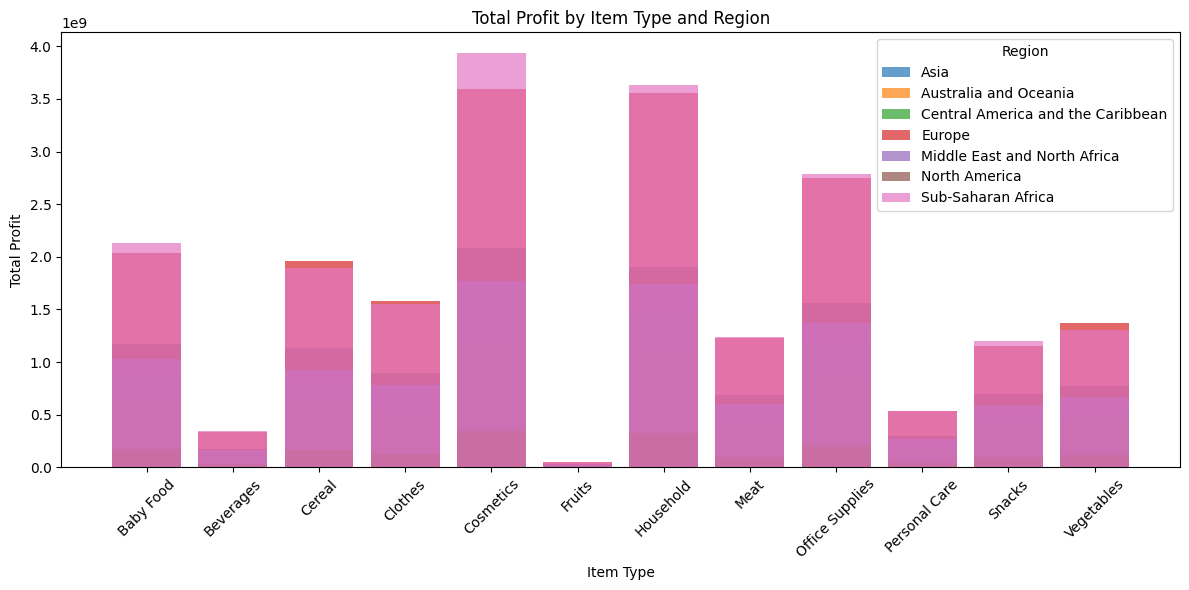

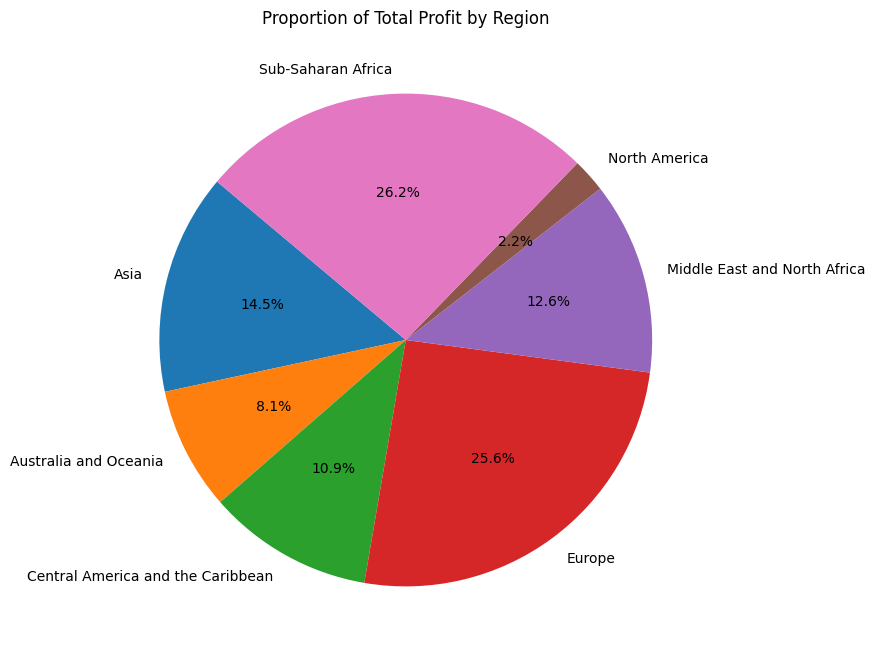

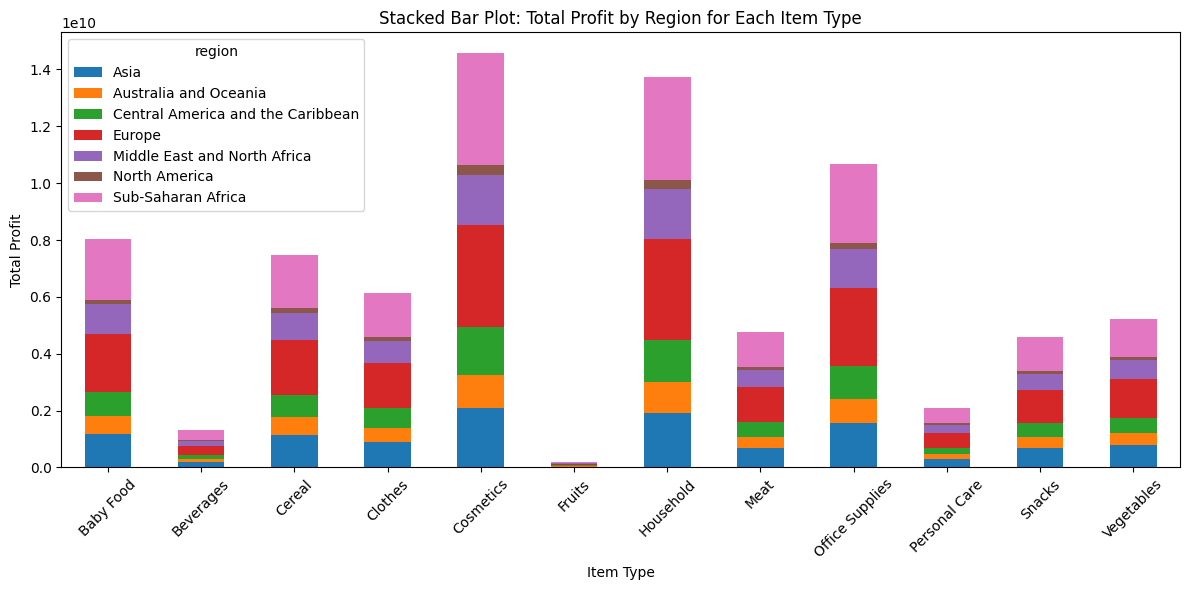

2024-12-19 20:46:21,092 - INFO - Visualizations created successfully.
INFO:__main__:Visualizations created successfully.


In [22]:
import pandas as pd  # Import pandas library
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import logging
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def fetch_data_from_cassandra(session) -> pd.DataFrame:
    """Fetch data from Cassandra and return it as a pandas DataFrame."""
    try:
        logger.info("Executing query to fetch data from 'sales_data_aggregated'.")

        # Retrieve all data from 'sales_data_aggregated'
        rows = session.execute("SELECT * FROM bigdata.sales_data_aggregated")

        # Convert the rows to a pandas DataFrame
        df = pd.DataFrame(list(rows))
        logger.info("Data fetched successfully from Cassandra.")

        return df
    except Exception as e:
        logger.error(f"An error occurred while fetching data from Cassandra: {e}")
        raise


def aggregate_data_by_region_item(df: pd.DataFrame) -> pd.DataFrame:
    """Aggregate total profit by region and item type."""
    try:
        logger.info("Aggregating total profit by region and item type.")

        # Perform aggregation: sum of total_profit grouped by region and item_type
        agg_profit_region_item = df.groupby(['region', 'item_type'])['total_profit'].sum().reset_index()
        logger.info("Aggregation by region and item type completed successfully.")

        return agg_profit_region_item
    except Exception as e:
        logger.error(f"An error occurred during aggregation by region and item type: {e}")
        raise


def plot_visualizations(agg_profit_region_item: pd.DataFrame):
    """Create visualizations based on aggregated profit data."""
    try:
        # Step 1: Plot 3 Visualizations

        # 2a. Bar Plot: Total Profit by Region and Item Type
        plt.figure(figsize=(12, 6))
        for region in agg_profit_region_item['region'].unique():
            region_data = agg_profit_region_item[agg_profit_region_item['region'] == region]
            plt.bar(region_data['item_type'], region_data['total_profit'], label=region, alpha=0.7)
        plt.xlabel('Item Type')
        plt.ylabel('Total Profit')
        plt.title('Total Profit by Item Type and Region')
        plt.legend(title='Region')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 2b. Pie Chart: Proportion of Total Profit by Region
        total_profit_by_region = agg_profit_region_item.groupby('region')['total_profit'].sum()
        plt.figure(figsize=(8, 8))
        plt.pie(total_profit_by_region, labels=total_profit_by_region.index, autopct='%1.1f%%', startangle=140)
        plt.title('Proportion of Total Profit by Region')
        plt.show()

        # 2c. Stacked Bar Plot: Total Profit by Region for Each Item Type
        pivot_data = agg_profit_region_item.pivot(index='item_type', columns='region', values='total_profit')
        pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
        plt.xlabel('Item Type')
        plt.ylabel('Total Profit')
        plt.title('Stacked Bar Plot: Total Profit by Region for Each Item Type')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        logger.info("Visualizations created successfully.")
    except Exception as e:
        logger.error(f"An error occurred while creating visualizations: {e}")
        raise


def main():
    try:
        # Replace with your Cassandra connection details
        secure_connect_bundle = '/content/secure-connect-finalbigdataproject.zip'
        client_id = 'FYIMqHUaDwjePnFIedsfyaMM'
        client_secret = 'wYs6DAq4jvzUtSkrAme1L9noXr8lp,mRSnZKQNZpvWxOqU5Jix621vWJpzDsx9Dba6LgAMjrEfoB8-dW1kdI+N.7B4xM-ZsWrBbrMBOY-n8K.vylTLYOX4Ug42+sLe2h'
        keyspace = 'bigdata'

        # Create Cassandra connection
        auth_provider = PlainTextAuthProvider(client_id, client_secret)
        cluster = Cluster(cloud={'secure_connect_bundle': secure_connect_bundle}, auth_provider=auth_provider)
        session = cluster.connect(keyspace)

        logger.info(f"Connected to Cassandra cluster and keyspace: {keyspace}")

        # Fetch data from Cassandra
        df = fetch_data_from_cassandra(session)

        # Aggregate data by region and item type
        agg_profit_region_item = aggregate_data_by_region_item(df)

        # Plot visualizations
        plot_visualizations(agg_profit_region_item)

    except Exception as e:
        logger.error(f"An error occurred: {e}")
        print(f"An error occurred: {e}")


if __name__ == '__main__':
    main()
